In [2]:
# 引入必要的库
import pandas as pd
import seaborn as sns
import numpy as np

## 任务内容
需求：在jupyter下对职位信息进行可视化分析；

### 薪资相关
1. 薪资分析
2. 不同城市薪资分布
3. N薪分布
4. 工作年限与薪资

### 职位分析
1. 不同城市职位数量
2. 公司融资情况
3. 不同行业公司数量
4. 工作经验分析
5. 职位标签：词云制作

In [4]:
# 第1步读取数据
pdata = pd.read_csv('题目4数据.csv', encoding="gbk") # gbk读取 utf8有问题
pdata.head()

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,2021/4/26 10:00,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice"
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,2021/4/28 5:18,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作"
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,2021/4/26 10:00,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪


## 薪资相关

### 1. 薪资分析

In [6]:
pdata[pdata['salary'].isna()] # 非法数据确认

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage


In [7]:
pdata[pdata['salary'].str.match(r'^(\d+)k-(\d+)k$') == False] # 其他薪资格式确认，只有一条

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
2771,306759,数据分析实习生,杭州酷玛网络技术有限公司,酷宝数据,15-50人,A轮,"电商,数据服务","['年终分红', '绩效奖金', '股票期权', '五险一金']",产品|需求|项目类,"['商业', '数据分析']",...,2021/2/2 9:30,杭州,滨江区,"['长河', '江南']",3k以上,0,在校/应届,全职,本科,周末双休，五险一金，节日福利


In [8]:
# 将范围修改为中间值
valid_salary = pdata[pdata['salary'].str.match(r'^(\d+)k-(\d+)k$')]
psalary_match = pdata['salary'].str.extract(r'(?P<lower>\d+)k-(?P<upper>\d+)k|(?P<above>\d+)k以上')

pdata['salary_value'] = psalary_match.apply(lambda x: (float(x.lower) + float(x.upper)) / 2 if pd.isna(x.above) else float(x.above), axis=1)


In [9]:
# 打标签
pdata['salary_label'] = pd.cut(pdata['salary_value'],bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['<=10k','10k+','20k+','30k+', '40k+','50k+','60k+','70k+','80k+','90k+'])

<Axes: xlabel='salary_label', ylabel='count'>

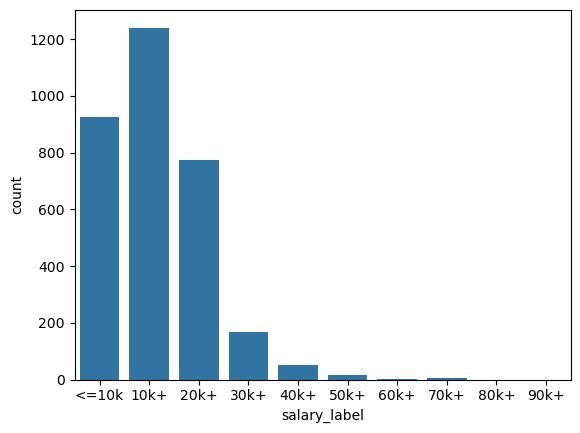

In [10]:
sns.countplot(pdata,x='salary_label') # 范围以中间值为薪资

### 2. 不同城市薪资分布

In [12]:
# sns.catplot(pdata,x='salary_label',kind='count', row='city')
cities = pdata.city.unique()
cities

array(['北京', '上海', '深圳', '南京', '武汉', '广州', '杭州', '成都', '重庆'], dtype=object)

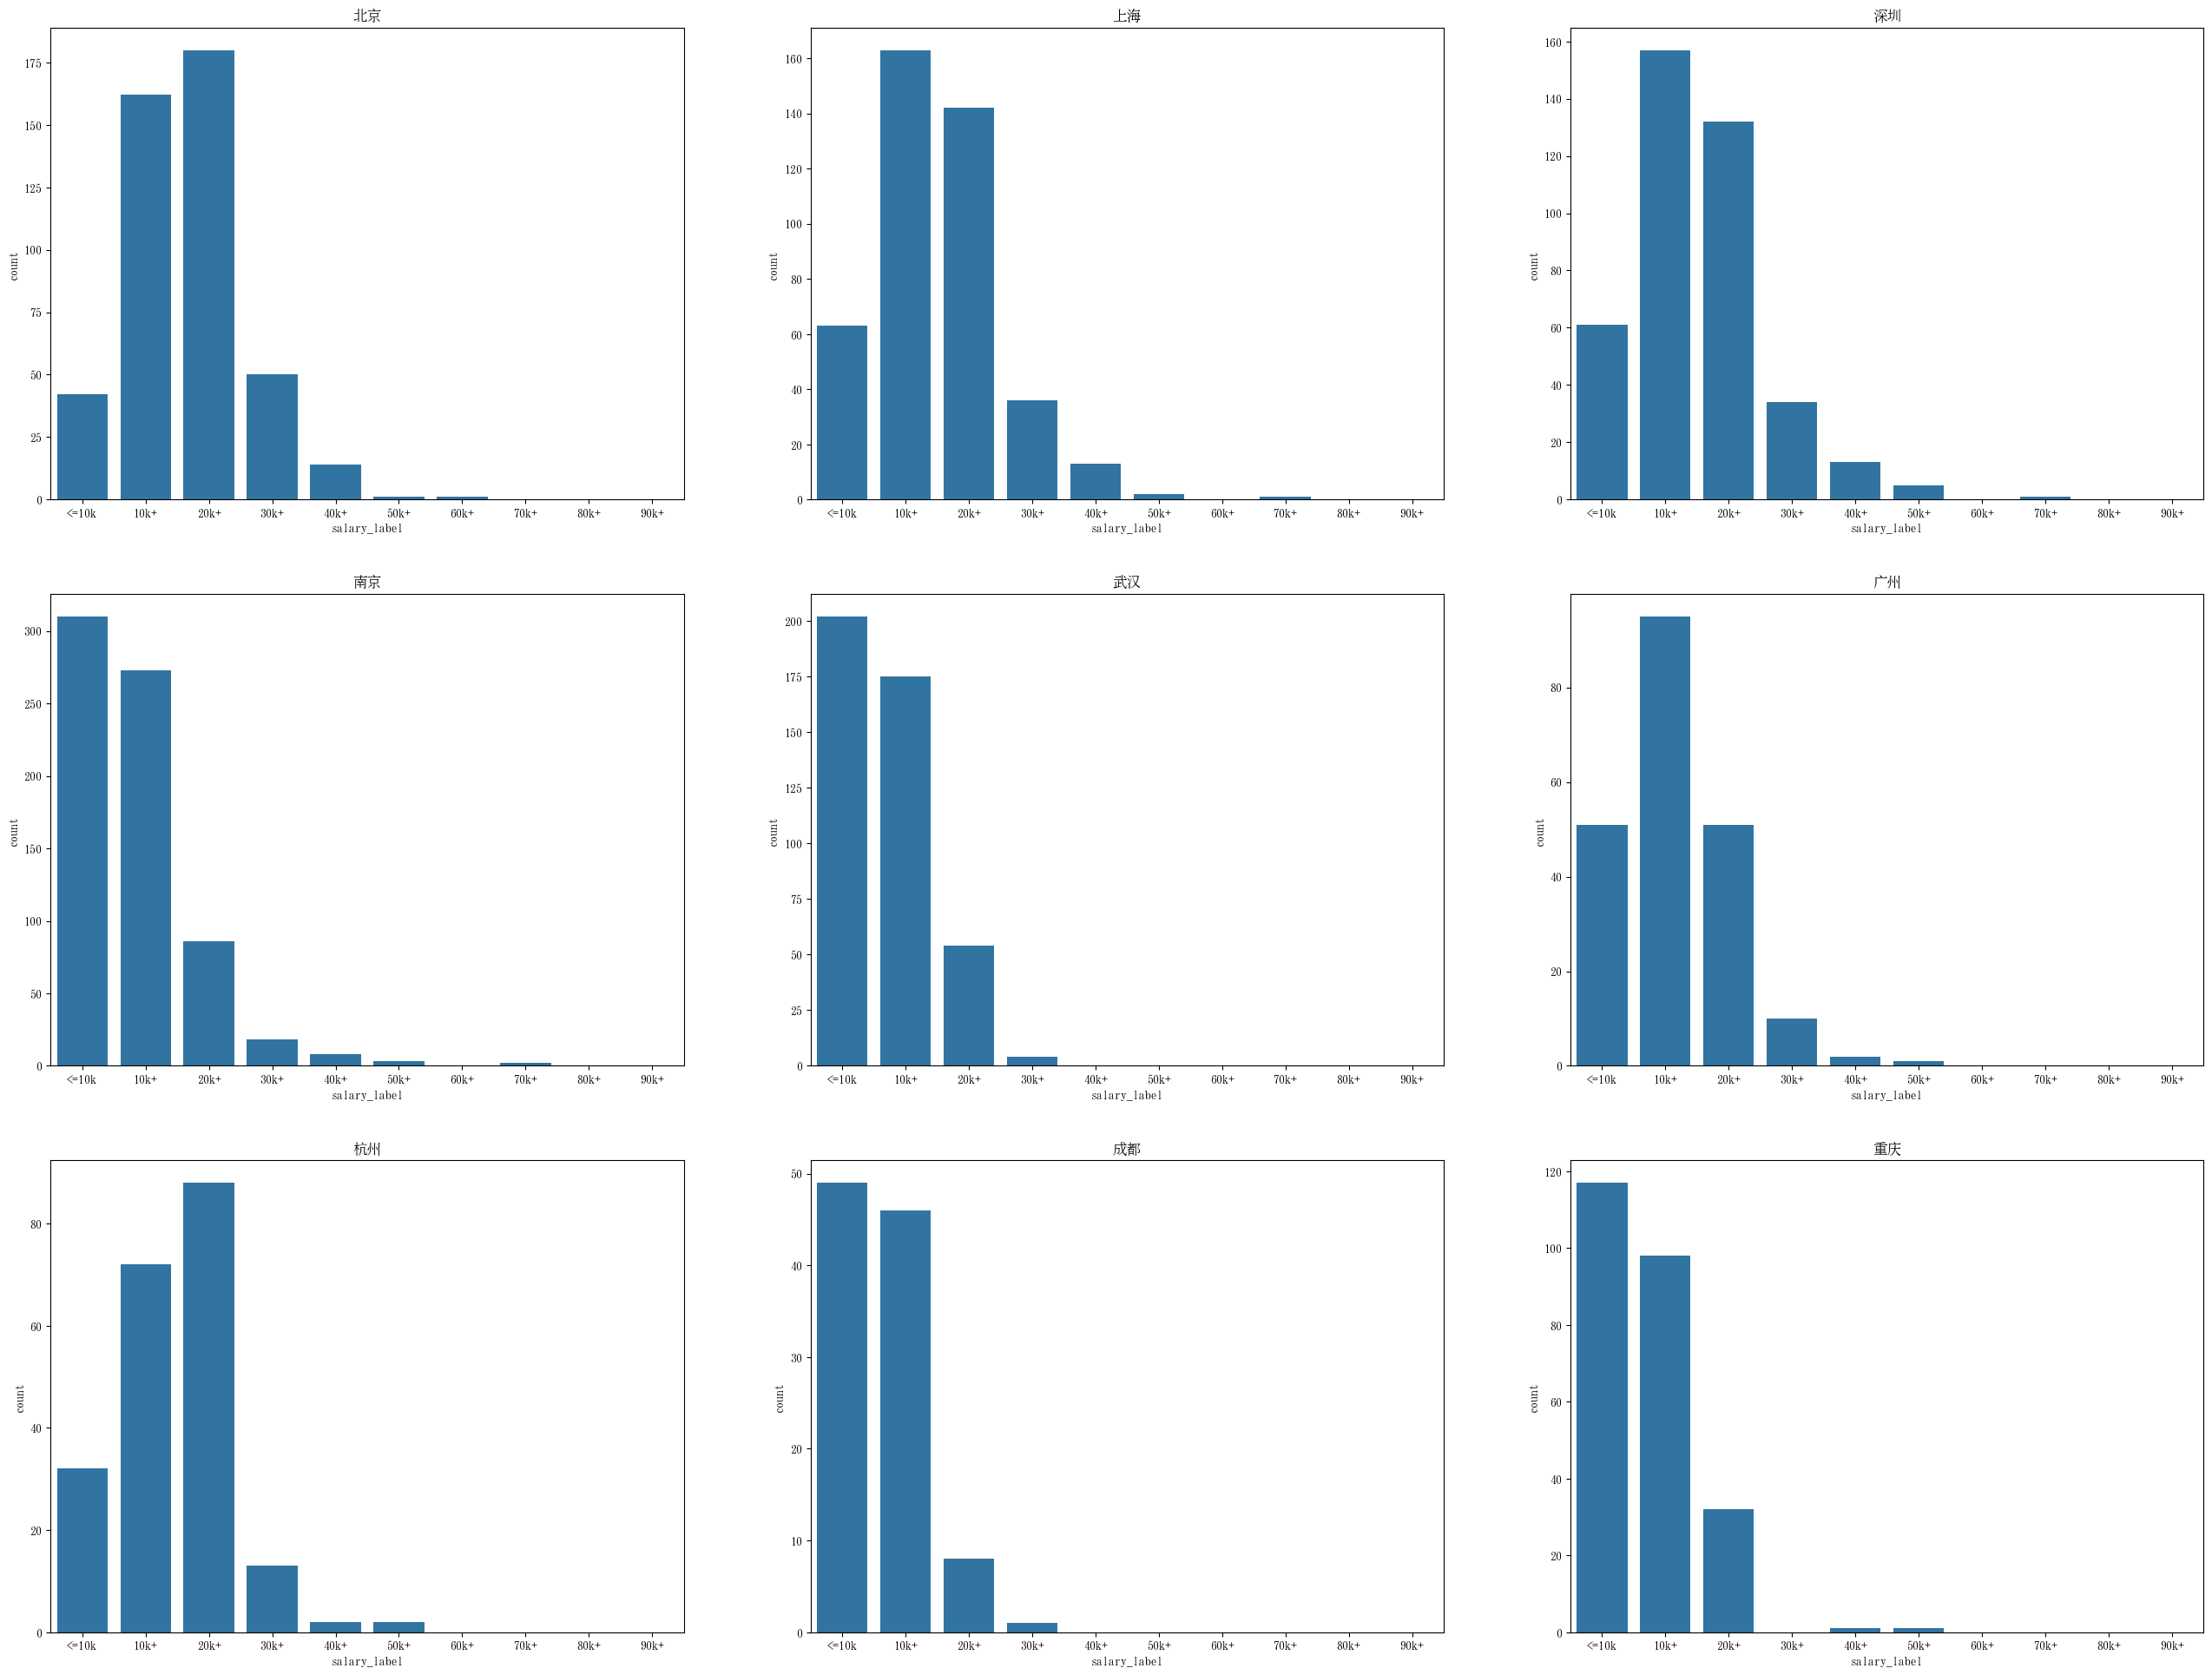

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32,24))
lens = len(cities)
plt.rcParams['font.sans-serif'] = ['SimSong']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题

for index,city in enumerate(cities):
    plt.subplot(lens//3, 3, index+1)
    ax = sns.countplot(x='salary_label', data=pdata[pdata['city']==city])
    ax.set_title(city)

### 3. N薪分布

In [15]:
pdata['n_salary'] = pdata.salaryMonth.map(lambda x: x if x != 0 else 12) # 0 认为是12薪

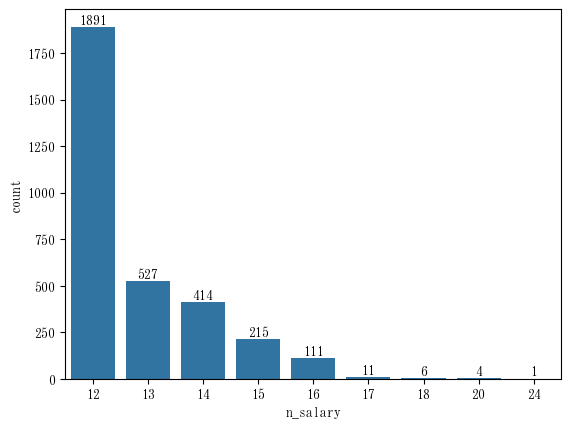

In [16]:
ax = sns.countplot(pdata, x='n_salary')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 4. 工作年限与薪资

In [18]:
pdata['workYear'].unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [19]:
pdata['year_salary'] = pdata['n_salary'] * pdata['salary_value'] # 总年薪

In [20]:
# 将工作年限映射为数值
wy_num = {
    '在校/应届': -2,
    '不限': -1,
    '1年以下': 0,
    '1-3年': 1,
    '3-5年': 3,
    '5-10年': 5,
    '10年以上': 10,
}
pdata['work_year_num'] = pdata.workYear.map(lambda wy: wy_num[wy])


[Text(-2, 0, '在校/应届'),
 Text(-1, 0, '不限'),
 Text(0, 0, '1年以下'),
 Text(1, 0, '1-3年'),
 Text(3, 0, '3-5年'),
 Text(5, 0, '5-10年'),
 Text(10, 0, '10年以上')]

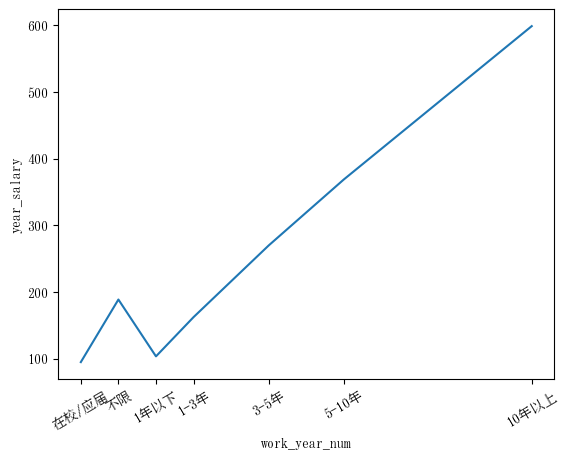

In [21]:
## 不同工作年限平均年薪
work_year_group = pdata.groupby('work_year_num')
work_year_salary_mean = work_year_group['year_salary'].agg('mean')
ax = sns.lineplot(work_year_salary_mean)

xticks = list(wy_num.values())
xticklabels = list(wy_num.keys())
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=30) 

## 职位分析

### 1. 不同城市职位数量

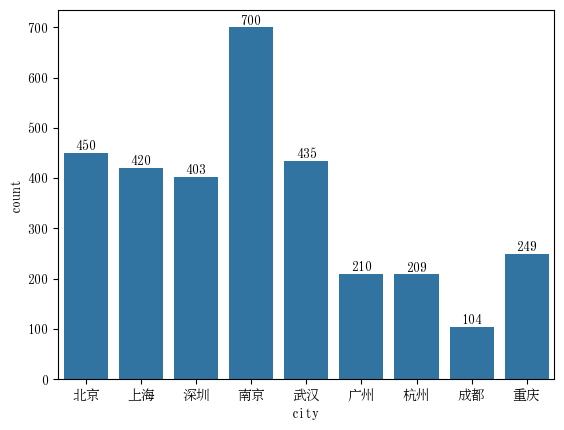

In [24]:
ax = sns.countplot(pdata, x='city')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 2. 公司融资情况

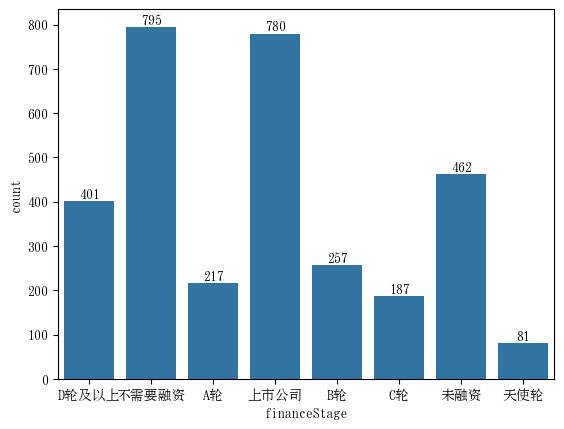

In [26]:

ax = sns.countplot(pdata, x='financeStage')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 3. 不同行业公司数量

In [28]:
# 各个行业的融资情况
pdata.industryField.unique()

array(['企业服务', '内容资讯,短视频', '区块链', '工具类产品,在线教育', '金融业,科技金融', '物流｜运输', '游戏',
       '工具类产品', '在线教育', '智能硬件,电商平台', '科技金融', '电商平台', '居住服务',
       '内容社区,音频｜视频媒体', '人工智能服务', '物流平台', '内容社区', '金融业', '社交媒体', '旅游｜出行',
       '数据服务｜咨询', '移动互联网,游戏', '移动互联网,企业服务', '移动互联网,社交', '软件服务｜咨询', '社交平台',
       '营销服务｜咨询', '教育、数据服务', '新零售,电商平台', '专业服务｜咨询', '生活服务', '移动互联网,电商',
       'IT技术服务｜咨询', '影视｜动漫', '教育｜培训', '短视频', '内容资讯,社交媒体', '软件服务｜咨询,在线医疗',
       '内容资讯,游戏,音频｜视频媒体', '短视频,新零售', '金融', '音频｜视频媒体', '制造业', 'MCN｜直播平台',
       '其他', '分类信息,消费生活', '软件服务｜咨询,数据服务｜咨询,人工智能服务', '数据服务｜咨询,营销服务｜咨询',
       '工具类产品,软件服务｜咨询', '汽车交易平台', '物联网', '硬件,软件开发', '硬件,电商', '内容资讯',
       '数据服务｜咨询,营销服务｜咨询,IT技术服务｜咨询', '教育', '通讯电子', '旅游｜出行,生活服务',
       '移动互联网,其他', 'IT技术服务｜咨询,智能硬件,能源｜矿产｜环保', '旅游', '医疗丨健康,企业服务',
       'IT技术服务｜咨询,软件服务｜咨询,数据服务｜咨询', '移动互联网,数据服务', '工具类产品,信息检索,信息安全',
       '企业服务,广告营销', '移动互联网,消费生活', '消费生活', '电商', '软件服务｜咨询,IT技术服务｜咨询',
       '房地产｜建筑｜物业', '数据服务｜咨询,人工智能服务', '软件服务｜咨询,智能硬件', '汽车丨出行',
       '人工智能服务,智能硬件', 'IT技

### 4. 工作经验分析

### 5. 职位标签：词云制作

In [31]:
pdata.head()

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,salaryMonth,workYear,jobNature,education,positionAdvantage,salary_value,salary_label,n_salary,year_salary,work_year_num
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice",22.5,20k+,14,315.0,3
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作",4.5,<=10k,12,54.0,-2
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观,35.0,30k+,12,420.0,5
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,14,1-3年,全职,本科,发展前景好，大牛团队,22.5,20k+,14,315.0,1
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,0,1-3年,全职,本科,15薪,20.0,10k+,12,240.0,1
